In [105]:
import pandas as pd
import numpy as np

In [106]:
# Import dataset again
df = pd.read_csv('dataset.csv')

df.head()

/var/folders/6l/qmqvgj8s289c7mz9jnkl56bm0000gq/T/ipykernel_18981/1885297019.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


,Car_Id,Person_Id,Trip,GPS_Time,Device_Time,GPS_Long,GPS_Lat,GPS_Speed_Ms,GPS_HDOP,GPS_Bearing,Gx,Gy,Gz,G_Calibrated,OBD_KPL_Average,OBD_Trip_KPL_Average,OBD_Intake_Air_Temp_C,Device_Barometer_M,GPS_Altitude_M,OBD_Engine_Load,OBD_Fuel_Level,GPS_Accuracy_M,OBD_Speed_Km,GPS_Speed_Km,Device_Trip_Dist_Km,OBD_Engine_Coolant_Temp_C,OBD_Engine_RPM,OBD_Adapter_Voltage,OBD_KPL_Instant,OBD_Fuel_Flow_CCmin,Device_Fuel_Remaining,OBD_Ambient_Air_Temp_C,OBD_CO2_gkm_Average,OBD_CO2_gkm_Instant,Device_Cost_Km_Inst,Device_Cost_Km_Trip,OBD_Air_Pedal,Context,Acceleration_kmhs,Reaction_Time,Air_Drag_Force,Speed_RPM_Relation,KPL_Instant
0,1,1,1,0,02-Sep-2016 09:00:39.858,0.0,0.0,0.0,0,0.0,-0.25,0.94,9.42,-0.05,11.95,6.83,23,930.50,0.0,2.35,0.0,0,49,0.0,1.00,68,2145.25,14.4,39.88,20.90,97.16,0,247.39,66.32,0.11,0.19,14.51,0,-1,2.777778,77.810185,0.022841,39.07
1,1,1,1,0,02-Sep-2016 09:00:40.858,0.0,0.0,0.0,0,0.0,-0.25,0.94,9.42,-0.05,11.95,6.92,23,930.47,0.0,0.00,0.0,0,47,0.0,1.01,68,2020.25,14.4,37.80,21.17,97.16,0,245.37,69.98,0.03,0.18,14.12,0,-2,1.388889,71.587963,0.023264,37.00
2,1,1,1,0,02-Sep-2016 09:00:41.856,0.0,0.0,0.0,0,0.0,-0.25,0.94,9.42,-0.05,11.95,7.01,22,930.47,0.0,0.00,0.0,0,43,0.0,1.02,68,1612.00,14.4,37.34,19.19,97.16,0,243.44,70.83,0.03,0.18,13.33,0,-4,0.694444,59.921296,0.026675,37.35
3,1,1,1,0,02-Sep-2016 09:00:42.860,0.0,0.0,0.0,0,0.0,-0.25,0.94,9.42,-0.05,11.96,7.10,22,930.50,0.0,1.96,0.0,0,32,0.0,1.03,69,1356.25,14.4,41.72,14.78,97.16,0,242.45,63.39,0.03,0.18,14.51,0,-11,0.252525,33.185185,0.023594,36.08
4,1,1,1,0,02-Sep-2016 09:00:43.863,0.0,0.0,0.0,0,0.0,-0.25,0.94,9.42,-0.05,11.96,7.15,23,930.50,0.0,22.35,0.0,0,28,0.0,1.04,69,1252.75,14.2,18.75,25.77,97.16,0,241.08,141.04,0.03,0.18,14.51,0,-4,0.694444,25.407407,0.022351,18.11


In [107]:
# df.Context.unique() # Context means Urban, Highway, etc. but only 1 value "Urban" exists
print(df.GPS_Time.unique())

[0 '0' 'Fri Oct 14 17:04:47 GMT-03:00 2016'
 'Fri Oct 14 17:04:48 GMT-03:00 2016' 'Fri Oct 14 17:04:49 GMT-03:00 2016'
 'Fri Oct 14 17:04:50 GMT-03:00 2016' 'Fri Oct 14 17:04:51 GMT-03:00 2016'
 'Fri Oct 14 17:04:52 GMT-03:00 2016' 'Fri Oct 14 17:04:53 GMT-03:00 2016'
 'Fri Oct 14 17:04:54 GMT-03:00 2016' 'Fri Oct 14 17:04:55 GMT-03:00 2016'
 'Fri Oct 14 17:04:56 GMT-03:00 2016' 'Fri Oct 14 17:04:57 GMT-03:00 2016'
 'Fri Oct 14 17:04:58 GMT-03:00 2016' 'Fri Oct 14 17:04:59 GMT-03:00 2016'
 'Fri Oct 14 17:05:00 GMT-03:00 2016' 'Fri Oct 14 17:05:01 GMT-03:00 2016'
 'Fri Oct 14 17:05:02 GMT-03:00 2016' 'Fri Oct 14 17:05:03 GMT-03:00 2016'
 'Fri Oct 14 17:05:04 GMT-03:00 2016' 'Fri Oct 14 17:05:05 GMT-03:00 2016'
 'Fri Oct 14 17:05:06 GMT-03:00 2016' 'Fri Oct 14 17:05:07 GMT-03:00 2016'
 'Fri Oct 14 17:05:08 GMT-03:00 2016' 'Fri Oct 14 17:05:09 GMT-03:00 2016'
 'Fri Oct 14 17:05:10 GMT-03:00 2016' 'Fri Oct 14 17:05:11 GMT-03:00 2016'
 'Fri Oct 14 17:05:12 GMT-03:00 2016' 'Fri Oct 14 17:05:

In [108]:
# Drop unecessary columns
df_feature_selection = df.drop(columns=["Reaction_Time", "GPS_Time", "Device_Time"])

df_feature_selection.columns

Index(['Car_Id', 'Person_Id', 'Trip', 'GPS_Long', 'GPS_Lat', 'GPS_Speed_Ms', 'GPS_HDOP', 'GPS_Bearing', 'Gx', 'Gy', 'Gz', 'G_Calibrated', 'OBD_KPL_Average', 'OBD_Trip_KPL_Average', 'OBD_Intake_Air_Temp_C', 'Device_Barometer_M', 'GPS_Altitude_M', 'OBD_Engine_Load', 'OBD_Fuel_Level', 'GPS_Accuracy_M', 'OBD_Speed_Km', 'GPS_Speed_Km', 'Device_Trip_Dist_Km', 'OBD_Engine_Coolant_Temp_C', 'OBD_Engine_RPM', 'OBD_Adapter_Voltage', 'OBD_KPL_Instant', 'OBD_Fuel_Flow_CCmin', 'Device_Fuel_Remaining', 'OBD_Ambient_Air_Temp_C', 'OBD_CO2_gkm_Average', 'OBD_CO2_gkm_Instant', 'Device_Cost_Km_Inst', 'Device_Cost_Km_Trip', 'OBD_Air_Pedal', 'Context', 'Acceleration_kmhs', 'Air_Drag_Force', 'Speed_RPM_Relation', 'KPL_Instant'], dtype='object')

In [109]:
# Clean data: handle all non-numeric characters properly
df_cleaned = df_feature_selection.copy()

print("Cleaning data...")
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        # Convert to string first
        df_cleaned[col] = df_cleaned[col].astype(str)
        
        # Replace common infinity and invalid representations
        df_cleaned[col] = df_cleaned[col].replace(['∞', 'inf', '-inf', 'nan', 'ﾃ??', 'null', 'NULL'], np.nan)
        
        # Try to convert to numeric, setting errors to NaN
        numeric_col = pd.to_numeric(df_cleaned[col], errors='coerce')
        
        # Check if conversion was successful (i.e., mostly numeric values)
        if numeric_col.notna().sum() > len(df_cleaned) * 0.5:  # More than 50% convertible
            df_cleaned[col] = numeric_col
            print(f"  Converted {col} to numeric")
        else:
            print(f"  Kept {col} as categorical (non-numeric)")

# Handle NaN values in numeric columns - fill with median
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    if df_cleaned[col].isna().any():
        nan_count = df_cleaned[col].isna().sum()
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"  Filled {nan_count} NaN values in {col} with median: {median_val}")

# Create X and y from cleaned data
X = df_cleaned.drop(columns=["OBD_CO2_gkm_Instant"])
y = pd.Series(df_cleaned["OBD_CO2_gkm_Instant"])

# Update categorical and numerical column lists
cat_col = ['Car_Id', 'Person_Id', 'Trip', 'Context']
num_col = [col for col in X.columns if col not in cat_col and X[col].dtype in ['int64', 'float64']]

print(f"\nFinal column counts:")
print(f"  Categorical columns: {len(cat_col)}")
print(f"  Numerical columns: {len(num_col)}")
print(f"  Total columns in X: {len(X.columns)}")

Cleaning data...
  Converted Device_Cost_Km_Inst to numeric
  Filled 7370 NaN values in Device_Cost_Km_Inst with median: 0.14

Final column counts:
  Categorical columns: 4
  Numerical columns: 35
  Total columns in X: 39


/var/folders/6l/qmqvgj8s289c7mz9jnkl56bm0000gq/T/ipykernel_18981/648675704.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)


In [110]:
# More thorough check of object columns
print("Checking all object-type columns for non-numeric data:")
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"\nColumn {col}:")
        # Check for various non-numeric patterns
        sample_values = X[col].dropna().head(10)
        print(f"  Sample values: {list(sample_values)}")
        
        # Try to convert to numeric and see what fails
        try:
            pd.to_numeric(X[col], errors='raise')
            print(f"  Can be converted to numeric")
        except:
            # Find non-numeric values
            non_numeric = []
            for val in X[col].dropna().unique():
                try:
                    float(val)
                except:
                    non_numeric.append(val)
            print(f"  Non-numeric values found: {non_numeric[:10]} ({'...' if len(non_numeric) > 10 else ''})")  

Checking all object-type columns for non-numeric data:


In [111]:
with pd.option_context('display.max_columns', None, 'display.width', 2000):
    print(X.describe())

             Car_Id     Person_Id         Trip      GPS_Long       GPS_Lat  GPS_Speed_Ms      GPS_HDOP    GPS_Bearing            Gx            Gy            Gz  G_Calibrated  OBD_KPL_Average  OBD_Trip_KPL_Average  OBD_Intake_Air_Temp_C  Device_Barometer_M  GPS_Altitude_M  OBD_Engine_Load  OBD_Fuel_Level  GPS_Accuracy_M  OBD_Speed_Km  GPS_Speed_Km  Device_Trip_Dist_Km  OBD_Engine_Coolant_Temp_C  OBD_Engine_RPM  OBD_Adapter_Voltage  OBD_KPL_Instant  OBD_Fuel_Flow_CCmin  Device_Fuel_Remaining  OBD_Ambient_Air_Temp_C  OBD_CO2_gkm_Average  Device_Cost_Km_Inst  Device_Cost_Km_Trip  OBD_Air_Pedal  Context  Acceleration_kmhs  Air_Drag_Force  Speed_RPM_Relation   KPL_Instant
count  91794.000000  91794.000000  91794.00000  91794.000000  91794.000000  91794.000000  91794.000000   91794.000000  91794.000000  91794.000000  91794.000000  91794.000000     91794.000000          91794.000000           91794.000000        91794.000000    91794.000000     91794.000000    91794.000000    91794.000000  917

In [112]:
# Preprocessing Mixed Data - moved here to use updated num_col
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define preprocessor after X is created and num_col is updated
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(), cat_col)
    ]
)

In [113]:
# X_preprocessed = preprocessor.fit_transform(X)

# #Turn X_preprocessed back to DataFrame for easier handling
# ohe = preprocessor.named_transformers_['cat']
# ohe_feature_names = ohe.get_feature_names_out(cat_col)
# all_feature_names = np.concatenate([num_col, ohe_feature_names])
# X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)
# X_preprocessed.head()

In [114]:
# from sklearn.ensemble import RandomForestRegressor
# random_forest = RandomForestRegressor(n_estimators=100, random_state = 42, n_jobs=-1)
# random_forest.fit(X_preprocessed, y)


In [115]:
# importances = pd.Series(random_forest.feature_importances_, index=X_preprocessed.columns)
# importances = importances.sort_values(ascending=False)

# print("Feature Importances:\n", importances)

# # Optionally select top N features
# top_features = importances.head(5).index.tolist()
# print("\nTop 5 important features:", top_features)

In [116]:
# Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])




In [117]:
# Fit the pipeline
forest.fit(X, y)

# Get feature importances from the fitted regressor
importances_values = forest.named_steps['regressor'].feature_importances_

# Reconstruct the feature names after preprocessing:
# - numeric columns are num_col
# - categorical columns were one-hot encoded by the preprocessor's 'cat' transformer
ohe = forest.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_col)

# Combine numeric + OHE feature names to match the transformed feature vector
all_feature_names = np.concatenate([num_col, ohe_feature_names])

# Debug: Check lengths
print(f"Length of importances_values: {len(importances_values)}")
print(f"Length of all_feature_names: {len(all_feature_names)}")
print(f"Length of num_col: {len(num_col)}")
print(f"Length of ohe_feature_names: {len(ohe_feature_names)}")
print(f"Length of cat_col: {len(cat_col)}")

# Check if lengths match before creating Series
if len(importances_values) == len(all_feature_names):
    # Create the Series with correct index and sort
    importances = pd.Series(importances_values, index=all_feature_names)
    importances = importances.sort_values(ascending=False)
    
    # Show top importances (optional)
    print("\nTop 20 feature importances:")
    print(importances.head(20))
else:
    print(f"\nERROR: Length mismatch!")
    print(f"Expected {len(importances_values)} features, got {len(all_feature_names)} feature names")
    
    # Let's investigate further
    print(f"\nNum_col contents: {num_col}")
    print(f"\nCat_col contents: {cat_col}")
    print(f"\nOHE feature names: {list(ohe_feature_names)}")



Length of importances_values: 63
Length of all_feature_names: 63
Length of num_col: 35
Length of ohe_feature_names: 28
Length of cat_col: 4

Top 20 feature importances:
OBD_KPL_Instant         0.440037
OBD_Fuel_Flow_CCmin     0.408116
KPL_Instant             0.046231
Air_Drag_Force          0.044495
OBD_Speed_Km            0.041074
Acceleration_kmhs       0.006050
Speed_RPM_Relation      0.001780
OBD_Engine_RPM          0.000906
GPS_Speed_Ms            0.000896
Gx                      0.000831
Device_Cost_Km_Inst     0.000771
OBD_Engine_Load         0.000714
Device_Trip_Dist_Km     0.000698
GPS_Speed_Km            0.000569
GPS_Long                0.000528
OBD_Air_Pedal           0.000469
OBD_Trip_KPL_Average    0.000384
GPS_Bearing             0.000378
G_Calibrated            0.000375
Gz                      0.000373
dtype: float64


## Using LASSO

In [118]:
# Use LASSO for feature selection
from sklearn.linear_model import LassoCV

lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lassoRegressor", LassoCV(cv=5, random_state=42))
])

lasso.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GPS_Long', 'GPS_Lat',
                                                   'GPS_Speed_Ms', 'GPS_HDOP',
                                                   'GPS_Bearing', 'Gx', 'Gy',
                                                   'Gz', 'G_Calibrated',
                                                   'OBD_KPL_Average',
                                                   'OBD_Trip_KPL_Average',
                                                   'OBD_Intake_Air_Temp_C',
                                                   'Device_Barometer_M',
                                                   'GPS_Altitude_M',
                                                   'OBD_Engine_Load',
                                                   'OBD_Fuel_Level',
                                                   'GPS_Accuracy_M',
                                                   'OBD_Speed_Km',...
                                                   'Device_Trip_Dist_Km',
                                                   'OBD_Engine_Coolant_Temp_C',
                                                   'OBD_Engine_RPM',
                                                   'OBD_Adapter_Voltage',
                                                   'OBD_KPL_Instant',
                                                   'OBD_Fuel_Flow_CCmin',
                                                   'Device_Fuel_Remaining',
                                                   'OBD_Ambient_Air_Temp_C',
                                                   'OBD_CO2_gkm_Average',
                                                   'Device_Cost_Km_Inst',
                                                   'Device_Cost_Km_Trip', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['Car_Id', 'Person_Id',
                                                   'Trip', 'Context'])])),
                ('lassoRegressor', LassoCV(cv=5, random_state=42))])

In [119]:
import numpy as np

# Reconstruct feature names that correspond to the transformed feature vector
# (numeric features + one-hot encoded categorical features) and use them as index.
try:
    ohe = lasso.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe.get_feature_names_out(cat_col)
    feature_names = np.concatenate([num_col, ohe_feature_names])
except Exception:
    # fallback if reconstruction fails (use precomputed all_feature_names)
    feature_names = all_feature_names

# Get LASSO coefficients
lasso_coef = lasso.named_steps['lassoRegressor'].coef_

# Create coefficient series with feature names
coef = pd.Series(lasso_coef, index=feature_names)

# Select features with non-zero coefficients
selected_features = coef[coef != 0]

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)
np.set_printoptions(threshold=np.inf)

print(f"Number of selected features (non-zero coefficients): {len(selected_features)}")
print("Selected features:", selected_features.index.tolist())
print("\nLASSO coefficients (non-zero only):")
print(selected_features.sort_values(ascending=False))
print(f"\nOptimal alpha (λ): {lasso.named_steps['lassoRegressor'].alpha_:.4f}")

if len(selected_features) == 0:
    print("\nWarning: LASSO selected no features. Alpha might be too high.")
    print("All coefficients:")
    print(coef.sort_values(ascending=False))

Number of selected features (non-zero coefficients): 35
Selected features: ['GPS_Speed_Ms', 'GPS_HDOP', 'GPS_Bearing', 'Gx', 'Gz', 'G_Calibrated', 'OBD_Trip_KPL_Average', 'OBD_Intake_Air_Temp_C', 'Device_Barometer_M', 'GPS_Altitude_M', 'OBD_Engine_Load', 'OBD_Speed_Km', 'GPS_Speed_Km', 'Device_Trip_Dist_Km', 'OBD_Engine_Coolant_Temp_C', 'OBD_Engine_RPM', 'OBD_Adapter_Voltage', 'OBD_Fuel_Flow_CCmin', 'Device_Fuel_Remaining', 'OBD_CO2_gkm_Average', 'Device_Cost_Km_Inst', 'OBD_Air_Pedal', 'Acceleration_kmhs', 'Air_Drag_Force', 'Speed_RPM_Relation', 'KPL_Instant', 'Person_Id_1', 'Person_Id_3', 'Trip_2', 'Trip_3', 'Trip_4', 'Trip_5', 'Trip_9', 'Trip_11', 'Trip_15']

LASSO coefficients (non-zero only):
OBD_Fuel_Flow_CCmin          146.330554
OBD_Engine_RPM               108.122869
Speed_RPM_Relation            62.826411
KPL_Instant                   51.110925
OBD_Engine_Load               34.779793
Acceleration_kmhs              8.748349
OBD_CO2_gkm_Average            8.156429
Trip_2        

## Fuel Efficiency

In [120]:
# Add new column "Fuel_Consumed_L" in df_cleaned
df_cleaned['Fuel_Consumed_L'] = df_cleaned['Device_Trip_Dist_Km'] / df_cleaned['OBD_KPL_Instant']

In [121]:
# Create X and y from cleaned data
X = df_cleaned.drop(columns=["Fuel_Consumed_L"])
y = pd.Series(df_cleaned["Fuel_Consumed_L"])

# Update categorical and numerical column lists
cat_col = ['Car_Id', 'Person_Id', 'Trip', 'Context']
num_col = [col for col in X.columns if col not in cat_col and X[col].dtype in ['int64', 'float64']]

# Change y if it has inf
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Change nan to median
y.fillna(y.median(), inplace=True)

print(f"Updated column counts for fuel consumption prediction:")
print(f"  Categorical columns: {len(cat_col)}")
print(f"  Numerical columns: {len(num_col)}")
print(f"  Total columns in X: {len(X.columns)}")

# Update preprocessor for the new feature set
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_fuel = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(), cat_col)
    ]
)

Updated column counts for fuel consumption prediction:
  Categorical columns: 4
  Numerical columns: 36
  Total columns in X: 40


In [122]:
# Create a new forest pipeline for fuel consumption prediction
forest_fuel = Pipeline(steps=[
    ("preprocessor", preprocessor_fuel),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

forest_fuel.fit(X, y)

# Get feature importances from the fitted regressor
importances_values = forest_fuel.named_steps['regressor'].feature_importances_

# Reconstruct the feature names after preprocessing:
# - numeric columns are num_col
# - categorical columns were one-hot encoded by the preprocessor's 'cat' transformer
ohe = forest_fuel.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_col)

# Combine numeric + OHE feature names to match the transformed feature vector
all_feature_names = np.concatenate([num_col, ohe_feature_names])

# Debug: Check lengths
print(f"Length of importances_values: {len(importances_values)}")
print(f"Length of all_feature_names: {len(all_feature_names)}")

# Create the Series with correct index and sort
importances = pd.Series(importances_values, index=all_feature_names)
importances = importances.sort_values(ascending=False)

# Show top importances (optional)
importances.head(20)

Length of importances_values: 64
Length of all_feature_names: 64


OBD_KPL_Instant              0.513113
Device_Trip_Dist_Km          0.345645
KPL_Instant                  0.053454
Device_Cost_Km_Inst          0.043189
OBD_Fuel_Flow_CCmin          0.008691
Device_Barometer_M           0.003882
OBD_Engine_Load              0.003580
Device_Fuel_Remaining        0.002454
Speed_RPM_Relation           0.002219
OBD_KPL_Average              0.001888
G_Calibrated                 0.001845
OBD_Air_Pedal                0.001836
Acceleration_kmhs            0.001770
OBD_Engine_Coolant_Temp_C    0.001729
OBD_CO2_gkm_Instant          0.001437
OBD_Speed_Km                 0.001347
OBD_Intake_Air_Temp_C        0.001236
Trip_1                       0.001137
OBD_Engine_RPM               0.001050
OBD_Adapter_Voltage          0.001011
dtype: float64

## OBD_Adapter_Voltage

In [123]:
# Create X and y from cleaned data
X = df_cleaned.drop(columns=["OBD_Adapter_Voltage"])
y = pd.Series(df_cleaned["OBD_Adapter_Voltage"])

# Update categorical and numerical column lists
cat_col = ['Car_Id', 'Person_Id', 'Trip', 'Context']
num_col = [col for col in X.columns if col not in cat_col and X[col].dtype in ['int64', 'float64']]

# Change y if it has inf
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Change nan to median
y.fillna(y.median(), inplace=True)

print(f"Updated column counts for fuel consumption prediction:")
print(f"  Categorical columns: {len(cat_col)}")
print(f"  Numerical columns: {len(num_col)}")
print(f"  Total columns in X: {len(X.columns)}")

# Update preprocessor for the new feature set
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_fuel = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(), cat_col)
    ]
)

Updated column counts for fuel consumption prediction:
  Categorical columns: 4
  Numerical columns: 36
  Total columns in X: 40


In [124]:
# Create a new forest pipeline for fuel consumption prediction
forest_fuel = Pipeline(steps=[
    ("preprocessor", preprocessor_fuel),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

forest_fuel.fit(X, y)

# Get feature importances from the fitted regressor
importances_values = forest_fuel.named_steps['regressor'].feature_importances_

# Reconstruct the feature names after preprocessing:
# - numeric columns are num_col
# - categorical columns were one-hot encoded by the preprocessor's 'cat' transformer
ohe = forest_fuel.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_col)

# Combine numeric + OHE feature names to match the transformed feature vector
all_feature_names = np.concatenate([num_col, ohe_feature_names])

# Debug: Check lengths
print(f"Length of importances_values: {len(importances_values)}")
print(f"Length of all_feature_names: {len(all_feature_names)}")

# Create the Series with correct index and sort
importances = pd.Series(importances_values, index=all_feature_names)
importances = importances.sort_values(ascending=False)

# Show top importances (optional)
importances.head(20)

Length of importances_values: 64
Length of all_feature_names: 64


OBD_KPL_Average              0.305736
OBD_Intake_Air_Temp_C        0.172668
OBD_CO2_gkm_Average          0.063463
Device_Trip_Dist_Km          0.044489
Device_Fuel_Remaining        0.042777
OBD_Engine_RPM               0.036284
Air_Drag_Force               0.032649
OBD_Trip_KPL_Average         0.027667
Trip_4                       0.027301
OBD_Speed_Km                 0.024038
Device_Barometer_M           0.018971
OBD_Engine_Coolant_Temp_C    0.016449
GPS_Lat                      0.015943
OBD_KPL_Instant              0.014388
OBD_Fuel_Flow_CCmin          0.014004
Person_Id_1                  0.013837
Person_Id_10                 0.011935
Fuel_Consumed_L              0.011007
GPS_Long                     0.009997
Speed_RPM_Relation           0.009759
dtype: float64

## Cross Validation for PCA

In [125]:
df_cleaned.head()

df_cleaned.columns

Index(['Car_Id', 'Person_Id', 'Trip', 'GPS_Long', 'GPS_Lat', 'GPS_Speed_Ms', 'GPS_HDOP', 'GPS_Bearing', 'Gx', 'Gy', 'Gz', 'G_Calibrated', 'OBD_KPL_Average', 'OBD_Trip_KPL_Average', 'OBD_Intake_Air_Temp_C', 'Device_Barometer_M', 'GPS_Altitude_M', 'OBD_Engine_Load', 'OBD_Fuel_Level', 'GPS_Accuracy_M', 'OBD_Speed_Km', 'GPS_Speed_Km', 'Device_Trip_Dist_Km', 'OBD_Engine_Coolant_Temp_C', 'OBD_Engine_RPM', 'OBD_Adapter_Voltage', 'OBD_KPL_Instant', 'OBD_Fuel_Flow_CCmin', 'Device_Fuel_Remaining', 'OBD_Ambient_Air_Temp_C', 'OBD_CO2_gkm_Average', 'OBD_CO2_gkm_Instant', 'Device_Cost_Km_Inst', 'Device_Cost_Km_Trip', 'OBD_Air_Pedal', 'Context', 'Acceleration_kmhs', 'Air_Drag_Force', 'Speed_RPM_Relation', 'KPL_Instant', 'Fuel_Consumed_L'], dtype='object')

In [126]:
# X and y for CO2_Instant
X = df_cleaned.drop(columns=["OBD_CO2_gkm_Instant"])
y = pd.Series(df_cleaned["OBD_CO2_gkm_Instant"])

In [127]:
# Using PCA with Cross-Validation
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [128]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Score with 1 PCA components: 142950.72731363232
Score with 2 PCA components: 109259.90765077093
Score with 3 PCA components: 668709.6833829517
Score with 4 PCA components: 17246334.907231018
Score with 5 PCA components: 141742.14194896154
Score with 6 PCA components: 305116.6785940942
Score with 7 PCA components: 316752.48161427677
Score with 8 PCA components: 237329.56006508516
Score with 9 PCA components: 170907.40587635266
Score with 10 PCA components: 677990.4186573243
Score with 11 PCA components: 506426.4591468435
Score with 12 PCA components: 180820.64342787256
Score with 13 PCA components: 183532.54237050063
Score with 14 PCA components: 187349.21782418241
Score with 15 PCA components: 188314.2657157344
Score with 16 PCA components: 186257.79176533426
Score with 17 PCA components: 187078.8560828601
Score with 18 PCA components: 197391.0529621584
Score with 19 PCA components: 197236.3254626445


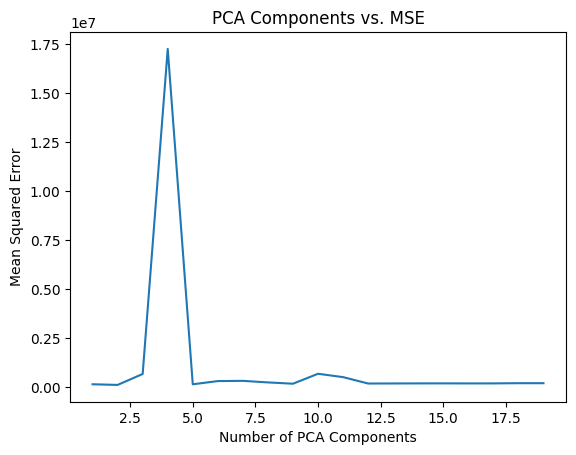

In [132]:
# Regression with PCA components
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

# Check score on different number of pca components
pca_scores = []
for i in range(1, 20):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(f"Score with {i} PCA components: {score}")
    # Save in a list for visualization later
    pca_scores.append(score)

# Visualize PCA scores
import matplotlib.pyplot as plt
plt.plot(range(1, 20), pca_scores)
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('PCA Components vs. MSE')
plt.show()


In [130]:
# Data Validation 
top_columns = ["OBD_KPL_Instant", "OBD_Fuel_Flow_CCmin", "KPL_Instant", "Air_Drag_Force", "OBD_Speed_Km", "Acceleration_kmhs", "Speed_RPM_Relation", "OBD_Engine_RPM", "GPS_Speed_Ms", "Gx", "Device_Cost_Km_Inst", "OBD_Engine_Load", "Device_Trip_Dist_Km", "GPS_Speed_Km", "GPS_Long", "OBD_Air_Pedal", "OBD_Trip_KPL_Average", "GPS_Bearing", "G_Calibrated", "Gz"]

Score after adding column OBD_KPL_Instant: 63273.21694658228
Score after adding column OBD_Fuel_Flow_CCmin: 42419.805076086246
Score after adding column KPL_Instant: 42440.665628052426
Score after adding column Air_Drag_Force: 23878.92777415186
Score after adding column OBD_Speed_Km: 26088.05279851526
Score after adding column Acceleration_kmhs: 26015.309652192132
Score after adding column Speed_RPM_Relation: 26047.17023433199
Score after adding column OBD_Engine_RPM: 25477.710515229785
Score after adding column GPS_Speed_Ms: 25470.787081439837
Score after adding column Gx: 25465.31347574951
Score after adding column Device_Cost_Km_Inst: 25366.99043622408
Score after adding column OBD_Engine_Load: 33959.06324166693
Score after adding column Device_Trip_Dist_Km: 33887.99424800116
Score after adding column GPS_Speed_Km: 40380.731083652194
Score after adding column GPS_Long: 43846.70625793658
Score after adding column OBD_Air_Pedal: 43640.96633470815
Score after adding column OBD_Trip_KPL

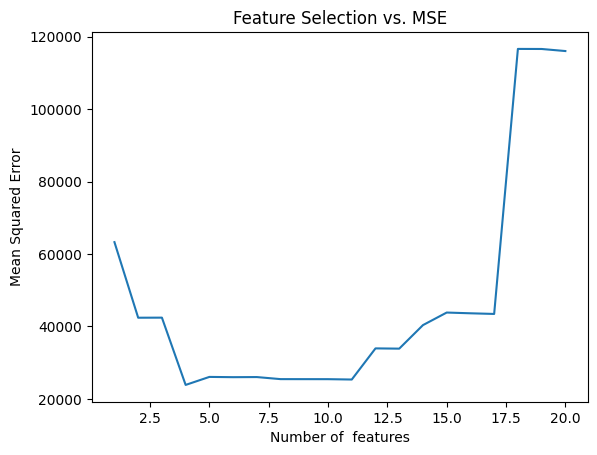

In [134]:
X_col = []
pca_scores = []
for col in top_columns:
    X_col.append(col)
    X = df_cleaned.loc[:, X_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(f"Score after adding column {col}: {score}")

    # Save in a list for visualization later
    pca_scores.append(score)

# Visualize PCA scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca_scores) + 1), pca_scores)
plt.xlabel('Number of  features')
plt.ylabel('Mean Squared Error')
plt.title('Feature Selection vs. MSE')
plt.show()
